#OutlierDetection and Removal

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error

tele = pd.read_csv("PdM_telemetry.csv")
tele.head() 

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [3]:
df=tele['pressure']
df.head()
median=tele['pressure'].median()

min:  72.41260528860741
max:  128.64080702836637


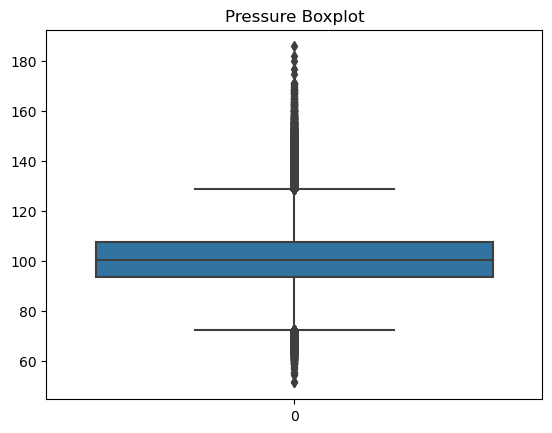

In [4]:
import seaborn as sns
sns.boxplot(df).set(title="Pressure Boxplot")
Q1 = df.quantile(0.25)

Q3 = df.quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)
print("min: ", Lower_Fence)
print("max: " , Upper_Fence)


In [5]:
# Position of the Outlier
import numpy as np
uo=np.where(df>Upper_Fence)
lo=np.where(df<Lower_Fence)
print("no. of outlier above max: ", len(uo[0]))
print("no. of outlier below min: ", len(lo[0]))
print("total datapoints: ", len(df))
print("total no. of points after removing outliers: ", len(uo[0])+len(lo[0]))

no. of outlier above max:  13077
no. of outlier below min:  2510
total datapoints:  876100
total no. of points after removing outliers:  15587


In [37]:
tele["pressure"] = np.where(tele["pressure"] >=Upper_Fence, median,tele['pressure'])
tele["pressure"] = np.where(tele["pressure"] <=Lower_Fence, median,tele['pressure'])

In [38]:
print(tele)

                   datetime  machineID        volt      rotate    pressure  \
0       2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1       2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2       2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3       2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4       2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   
...                     ...        ...         ...         ...         ...   
876095  2016-01-01 02:00:00        100  179.438162  395.222827  102.290715   
876096  2016-01-01 03:00:00        100  189.617555  446.207972   98.180607   
876097  2016-01-01 04:00:00        100  192.483414  447.816524   94.132837   
876098  2016-01-01 05:00:00        100  165.475310  413.771670  104.081073   
876099  2016-01-01 06:00:00        100  171.336037  496.096870   79.095538   

        vibration  
0       45.087686  
1       43.413973  
2  

In [1]:
import seaborn as sns
sns.boxplot(tele['pressure']).set(title="Pressure Boxplot")
sns.boxplot(tele['vibration']).set(title="Vibration Boxplot")
Q1 = tele['pressure'].quantile(0.25)
Q3 = tele['pressure'].quantile(0.75)
IQR = Q3 - Q1
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print("min: ", Lower_Fence)
print("max: " , Upper_Fence)


NameError: name 'tele' is not defined

min:  26.265839134505306
max:  54.296397779588624


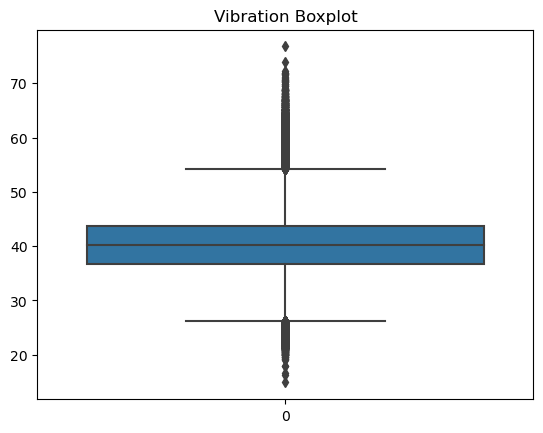

In [63]:
sns.boxplot(tele['vibration']).set(title="Vibration Boxplot")
Q1 = tele['vibration'].quantile(0.25)
Q3 = tele['vibration'].quantile(0.75)
IQR = Q3 - Q1
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print("min: ", Lower_Fence)
print("max: " , Upper_Fence)
median=tele['vibration'].median()



In [66]:
tele["vibration"] = np.where(tele["vibration"] >=Upper_Fence, median,tele['vibration'])
tele["vibration"] = np.where(tele["vibration"] <=Lower_Fence, median,tele['vibration'])

min:  26.621659926695322
max:  53.823227611917055


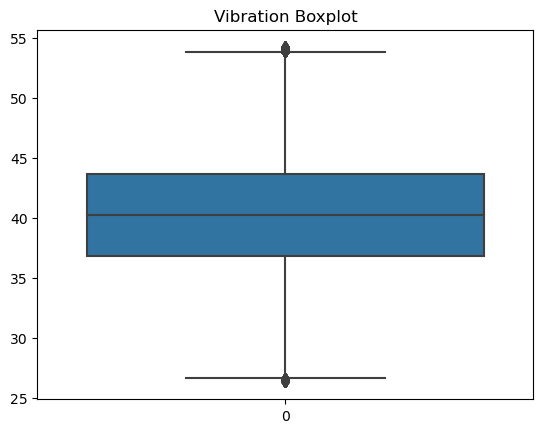

In [67]:
sns.boxplot(tele['vibration']).set(title="Vibration Boxplot")
Q1 = tele['vibration'].quantile(0.25)
Q3 = tele['vibration'].quantile(0.75)
IQR = Q3 - Q1
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print("min: ", Lower_Fence)
print("max: " , Upper_Fence)
median=tele['vibration'].median()

min:  307.4993845382994
max:  586.9829291335263


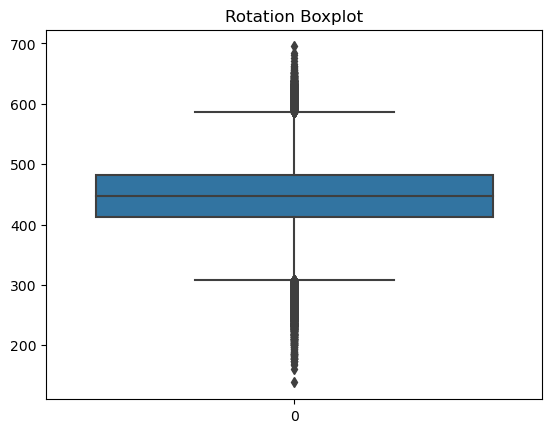

In [69]:
sns.boxplot(tele['rotate']).set(title="Rotation Boxplot")
Q1 = tele['rotate'].quantile(0.25)
Q3 = tele['rotate'].quantile(0.75)
IQR = Q3 - Q1
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print("min: ", Lower_Fence)
print("max: " , Upper_Fence)
median=tele['rotate'].median()

In [72]:
tele["rotate"] = np.where(tele["rotate"] >=Upper_Fence, median,tele['rotate'])
tele["rotate"] = np.where(tele["rotate"] <=Lower_Fence, median,tele['rotate'])

min:  311.08693456575725
max:  584.0503453247973
meidan:  447.55814952108653


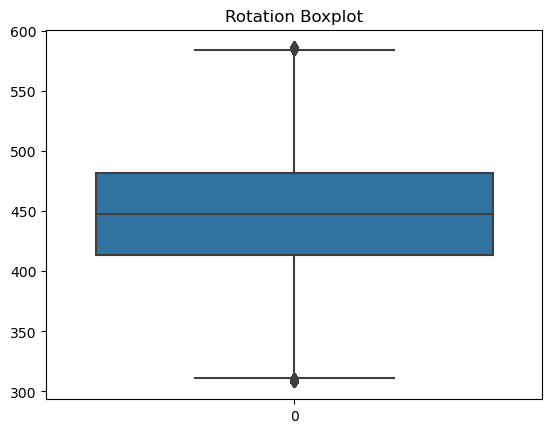

In [73]:
sns.boxplot(tele['rotate']).set(title="Rotation Boxplot")
Q1 = tele['rotate'].quantile(0.25)
Q3 = tele['rotate'].quantile(0.75)
IQR = Q3 - Q1
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print("min: ", Lower_Fence)
print("max: " , Upper_Fence)
median=tele['rotate'].median()
print('meidan: ',median )

min:  129.25557831723023
max:  212.05384250992023


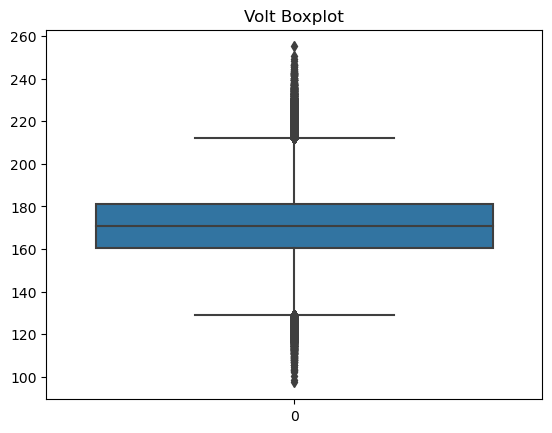

In [74]:
sns.boxplot(tele['volt']).set(title="Volt Boxplot")
Q1 = tele['volt'].quantile(0.25)
Q3 = tele['volt'].quantile(0.75)
IQR = Q3 - Q1
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print("min: ", Lower_Fence)
print("max: " , Upper_Fence)
median=tele['volt'].median()

tele["volt"] = np.where(tele["volt"] >=Upper_Fence, median,tele['volt'])
tele["volt"] = np.where(tele["volt"] <=Lower_Fence, median,tele['volt'])

min:  130.0043294518622
max:  211.19768514828309


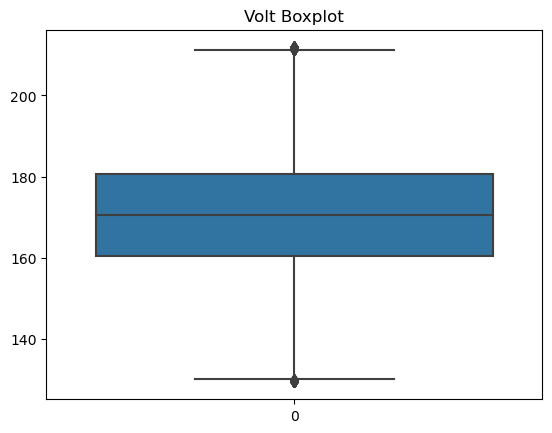

In [75]:
sns.boxplot(tele['volt']).set(title="Volt Boxplot")
Q1 = tele['volt'].quantile(0.25)
Q3 = tele['volt'].quantile(0.75)
IQR = Q3 - Q1
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print("min: ", Lower_Fence)
print("max: " , Upper_Fence)
median=tele['volt'].median()

In [132]:
# tele['datetime']= pd.to_datetime(tele['datetime'])
# tele.set_index('datetime', inplace=True)
X=tele.drop('machineID',axis=1)

X=X.drop('vibration',axis=1)
print(X)
y=tele['vibration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                           volt      rotate    pressure
datetime                                               
2015-01-01 06:00:00  176.217853  418.504078  113.077935
2015-01-01 07:00:00  162.879223  402.747490   95.460525
2015-01-01 08:00:00  170.989902  527.349825   75.237905
2015-01-01 09:00:00  162.462833  346.149335  109.248561
2015-01-01 10:00:00  157.610021  435.376873  111.886648
...                         ...         ...         ...
2016-01-01 02:00:00  179.438162  395.222827  102.290715
2016-01-01 03:00:00  189.617555  446.207972   98.180607
2016-01-01 04:00:00  192.483414  447.816524   94.132837
2016-01-01 05:00:00  165.475310  413.771670  104.081073
2016-01-01 06:00:00  171.336037  496.096870   79.095538

[876100 rows x 3 columns]


In [134]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
# Predicting on the test data
pred_test = lr.predict(X_test)
print(pred_test)
print(y_test)

[40.28684545 40.25292903 40.27984115 ... 40.23860218 40.23997034
 40.26336357]
datetime
2015-09-21 14:00:00    46.432730
2015-01-17 11:00:00    38.855552
2015-12-14 20:00:00    40.031070
2015-05-08 07:00:00    52.098697
2015-12-15 08:00:00    37.055618
                         ...    
2015-03-03 17:00:00    40.458558
2015-01-18 07:00:00    40.237247
2015-05-20 18:00:00    35.590038
2015-08-01 21:00:00    38.480535
2015-08-23 08:00:00    38.782532
Name: vibration, Length: 175220, dtype: float64


In [128]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred_test)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 0.0%


OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 640x480 with 1 Axes>